# Luchtvervuiling

Studenten: Wietske Boersma, Isa van den Hoven, Alecsandru Kreefft-Libiu, Timber Rijsdorp

Teamnummer: N5

In [1]:
# Load image from link
url = 'https://media.licdn.com/dms/image/D5612AQH1MTiY7j-UAw/article-cover_image-shrink_600_2000/0/1684297563132?e=2147483647&v=beta&t=5tFYOGCrBbrjSaZTxjmfPHqnuTM3Vs1L5ZiSOQi2zT8'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© Devic Earth"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Devic Earth


## Introduction

Longkanker is één van de meest voorkomende vormen van kanker. Diverse onderzoeken naar de oorzaken van longkanker hebben risicofactoren gevonden, waaronder luchtvervuiling. Steden en industriële gebieden met hoge niveaus van uitstoot van diverse stoffen, zoals stikstofoxide en zwaveldioxide, hebben verhoogde risico's. Deze verontreinigende stoffen kunnen diep doordringen in de longen en chronische ontstekingen veroorzaken, wat kan leiden tot de ontwikkeling van kanker.
In dit overzicht worden diverse visualisaties gepresenteerd die inzicht bieden in de relatie tussen luchtvervuiling en longkanker. Er wordt vanuit twee perspectieven naar de kwestie gekeken. Het eerste perspectief benadrukt dat luchtvervuiling verminderd moet worden, omdat het een toename van longkankerdiagnoses veroorzaakt. Het tweede perspectief maakt een vergelijking met de impact van roken op de diagnose van longkanker. En hoe de impact van luchtvervuiling mogelijk in het niet valt in vergelijking met de correlatie tussen roken en de diagnose van longkanker. In de visualisaties wordt verwezen naar de TBL-rate, waarmee Tracheaal, Bronchitis en Longkanker worden aangeduid.

## Dataset and Preprocessing

Voor dit onderzoek hebben we 3 datasets gebruikt. Namelijk een dataset met de hoeveelheid doden voor longkanker, een dataset met de specifieke uistoten in luchtvervuiling, een dataset met de dagelijkse rokers per land. Voor de dataset met uitstoten hebben we nog een 4e dataset ter ondersteuning gebruikt om te rekenen van totale uitstoot naar uitstoot per capita. De gedetaileerde beschrijving van de datasets en hoe we het hebben gefilterd voor gebruik kan je zien in het hoofdstuk: [Data Preprocessing](https://timber4.github.io/InformationVisualisationProject/docs/preprocessing.html). 

## Perspectief 1: Luchtvervuiling moet direct verminderd worden voor de bescherming van de gezondheid

Het is algemeen bekend dat plekken waar veel luchtvervuilende stoffen zijn grotere gezonheidsrisico's zijn. Zelfs in Nederland hebben we hiermee te maken. EenVandaag (2020) heeft onderzoek gedaan naar de hoeveelheid longkanker patiënten bij Tata Steel. EenVandaag heeft uit cijfers van het Integraal Kankerinstituut Nederland (IKNL) gevonden dat in de buurt van de Tata Steel fabriek in Beverwijk tot wel 50% meer longkankerpatiënten voorkomen. Deze verhalen zorgen voor veel zorgen bij mensen in ernstig vervuilende gebieden, en organisaties zoals GreenPeace (2024) voeren protesten uit in de hoop dat Tata Steel sneller vergroent. 

In dit stuk zullen we doormiddel van het onderzoeken van data rondom sterftecijfers van longkanker en uitstoot van luchtvervuilende stoffen, het effect van luchtvervuiling laten zien en beargumenteren dat het snel verminderd moet worden.

### Argument: Luchtvervuiling veroorzaakt longkanker

Zoals eerder benoemd is het algemeen bekend dat luchtvervuiling longkanker veroorzaakt, maar het is ook belangrijk dat we dit verband duidelijk kunnen aantonen. Na dit stuk zal voor de lezer duidelijk worden dat luchtvervuiling een belangrijke factor is in het krijgen van longkanker en dat we zo snel mogelijk de luchtvervuiling moeten verminderen.

Eerst kunnen we kijken naar de luchtvervuiling van verschillende landen met sterk verschillende industrieën. De CIA (2017) heeft een publiek rapport waarin te vinden is hoeveel procent van het bruto binnenlands product van elk land naar welke sector gaat. De sectoren die hier worden bijgehouden zijn: industrie, diensten en agricultuur. Hiermee kunnen we drie landen kiezen die een absolute meerderheid in verschillende sectoren. De gekozen landen zijn Angola met industrie, Argentinië met diensten en Sierra Leone met agricultuur.

In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

country_codes = ['AGO', 'ARG', 'SLE']

df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_2012_countries = df_2012[df_2012['Code'].isin(country_codes)]

countries = ['Angola (Industrie)', 'Argentinië (Diensten)', 'Siera Leone (Agricultuur)']

trace = [
    go.Bar(
        x = countries,
        y = df_2012_countries['Nitrogen oxide (NOx)'],
        name = 'NOx per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Sulphur dioxide (SO₂) emissions'],
        name = 'SO2 per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Carbon monoxide (CO) emissions'],
        name = 'CO per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Non-methane volatile organic compounds (NMVOC) emissions'],
        name = 'NMVOC per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['Ammonia (NH₃) emissions'],
        name = 'NH3 per 1000 inwoners'
    ),
    go.Bar(
        x = countries,
        y = df_2012_countries['TBL rate'],
        name = 'Longkanker leeftijd gestandardiseerd'
    )]    
fig = go.Figure(trace)
fig.update_layout(barmode='group', title='Uistoten van verschillende stoffen en de sterftecijfers van longkanker per land')
fig.show()

> *Figure 1: Staafdiagram die de uitstoot van verschillende schadelijke stoffen laat zien en de hoeveelheid mensen die overleden zijn aan kanker.*

Opvallend zien we hier dat het land met de grootste diensten sector de hoogste sterftecijfers heeft voor longkanker. Dit kan mogelijk komen door de hoeveelheid stikstofoxide uitstoot dat Argentinië heeft. Als we deze staafdiagram aflezen lijkt stikstofoxide de belangrijkste veroorzaker van longkanker en koolstofmonooxide een verwaarloosbare rol. 

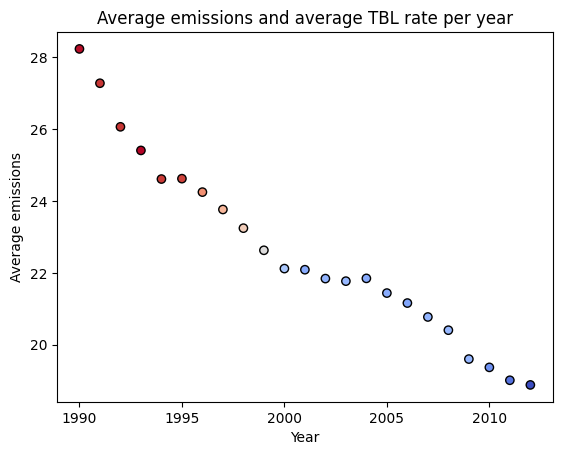

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/norm.csv')


df['gem uitstoot 2'] = df[['Nitrogen oxide (NOx)','Sulphur dioxide (SO₂) emissions','Carbon monoxide (CO) emissions','Organic carbon (OC) emissions','Non-methane volatile organic compounds (NMVOC) emissions','Black carbon (BC) emissions','Ammonia (NH₃) emissions']].mean(axis=1)


gem_uitstoot_per_jaar = df.groupby('Year')['gem uitstoot 2'].mean().reset_index()
gem_TBL = df.groupby('Year')['TBL rate'].mean().reset_index()
gem_smokers = df.groupby('Year')['Percentage daily smokers'].mean().reset_index()


merged_df = gem_uitstoot_per_jaar.merge(gem_TBL, on='Year').merge(gem_smokers, on='Year')


y = merged_df['Percentage daily smokers']
x = merged_df['Year']
z = merged_df['TBL rate']


colors1 = z/max(z)




y2 = merged_df['gem uitstoot 2']
x2 = merged_df['Year']
z2 = merged_df['TBL rate']


colors =  z2 / max(z2)


plt.scatter(x2,y2, c=colors, cmap='coolwarm', edgecolors='black')
plt.title('Average emissions and average TBL rate per year')
plt.xlabel('Year')
plt.ylabel('Average emissions')
plt.show()

> *Figure 2: De gemiddelde uitstoot per jaar, de kleur van elk punt correspondeert met de hoeveelheid longkanker-doden (blauw:laag-rood:hoog).*

Bovenstaande grafiek geeft de wereldwijde emissie uitstoot over de jaren 1990 tot 2012 weer. De waarde van de wereldwijde emissie-uitstoot is bepaald door een gemiddelde van de emissie-uitstoten van 183 landen. De TBL rate is een schaal die de mate van gediagnosticeerde longkanker weergeeft. Voor deze waarde is tevens het gemiddelde genomen van de 183 betreffende landen. De sterkte van de TBL rate wordt in de grafiek aan de hand van een kleur aangeduid. Hoe warmer de kleur, hoe hoger de TBL rate en hoe koeler de kleur, hoe lager de rate. 
De afnemende trend in de grafiek laat een daling in wereldwijde uitstoot zien door de jaren heen. Tevens is er een verandering in kleur te zien naarmate de jaren vorderen. Deze verandering duidt op een afname in TBL rate. Deze grafiek toont een correlatie tussen de wereldwijde emissie-uitstoot en de hoeveelheid gediagnosticeerde kanker. Deze correlatie suggereert een verband tussen lonkanker en uitstoot. Wel bevat de grafiek door het groeperen van data nog maar 22 datapunten. Er is niet met zekerheid te zeggen of de correlatie een daadwerkelijk verband aantoont.
 

## Perspectief 2: Het verminderen van luchtvervuiling heeft geen prioriteit, omdat het geen grote impact heeft op de gezondheid.

* Andere oorzaken van longkanker zijn erger
* Luchtvervuiling neemt al af

### Argument: Roken is een grotere factor in het krijgen van longkanker

Hoewel er een correlatie bestaat tussen luchtvervuiling en longkanker, is de correlatie tussen roken en longkanker veel erger.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
pd.options.mode.chained_assignment = None  # //TODO:Voor nu oplossing, later verwijderen

df = pd.read_csv('datasets/norm.csv')
df_2012 = df[df['Year'] == 2012]
df_2012['Mean Air Pollution'] = df_2012[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions']].mean(axis=1)


df_2012['Mean Air Pollution'] = df_2012['Mean Air Pollution']
df_2012['Percentage daily smokers'] = df_2012['Percentage daily smokers']

pearsons_r = df_2012['Mean Air Pollution'].corr(df_2012['Percentage daily smokers'])


fig = px.scatter(df_2012, x='Percentage daily smokers', y='Mean Air Pollution', size='TBL rate', hover_name='Code', color='TBL rate', size_max=35, color_continuous_scale='Reds')


# Customize layout and tooltip text
fig.update_layout(
   title='Bubble plot met de gemiddelde uitstoot, hoeveelheid rokers en de hoeveelheid longkanker-doden',
   xaxis_title=' Smokers',
   yaxis_title='Mean Air Pollution per country',
)


# Set text format for tooltips
fig.update_traces(textposition='top center')


# Show plot
fig.show()


> *Figure 3: Bubble plot met de gemiddelde uitstoot en de hoeveelheid rokers, de grote van elk punt geeft de hoeveelheid longkanker-doden aan.*

In deze bubble chart worden de mate van luchtvervuiling en het percentage van dagelijkse rokers tegen elkaar afgezet. Elke bubbel geeft een land in een jaar weer, de grootte en de kleur van de bubbels geven inzicht in de bijbehorende TBL-rate. Hoe donkerder en groter de bubbel des te hoger de TBL-rate. Uit de chart kan worden opgemaakt dat het verband tussen roken en de TBL-rate aanzienlijk sterker is, dan het verband tussen mate van vervuiling en de TBL-rate.

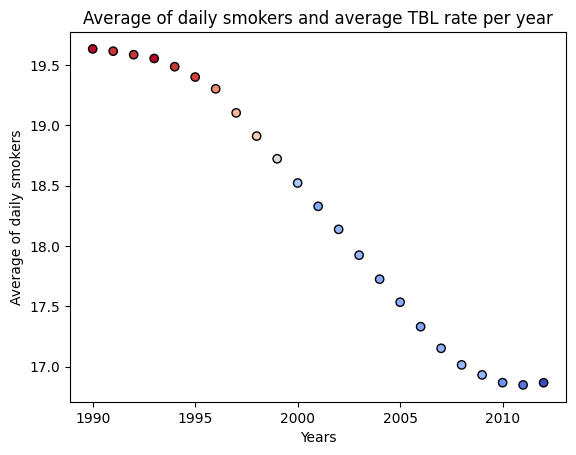

In [5]:
df = pd.read_csv('datasets/norm.csv')


df['gem uitstoot 2'] = df[['Nitrogen oxide (NOx)','Sulphur dioxide (SO₂) emissions','Carbon monoxide (CO) emissions','Organic carbon (OC) emissions','Non-methane volatile organic compounds (NMVOC) emissions','Black carbon (BC) emissions','Ammonia (NH₃) emissions']].mean(axis=1)


gem_uitstoot_per_jaar = df.groupby('Year')['gem uitstoot 2'].mean().reset_index()
gem_TBL = df.groupby('Year')['TBL rate'].mean().reset_index()
gem_smokers = df.groupby('Year')['Percentage daily smokers'].mean().reset_index()


merged_df = gem_uitstoot_per_jaar.merge(gem_TBL, on='Year').merge(gem_smokers, on='Year')


y = merged_df['Percentage daily smokers']
x = merged_df['Year']
z = merged_df['TBL rate']


colors1 = z/max(z)

plt.scatter(x,y, c=colors1, cmap='coolwarm',edgecolors='black')
plt.title('Average of daily smokers and average TBL rate per year')
plt.xlabel('Years')
plt.ylabel('Average of daily smokers')
plt.show()

> *Figure 4: De gemiddelde percentage dagelijkse rokers, de kleur van elk punt correspondeert met de hoeveelheid longkanker-doden (blauw:laag-rood:hoog).*

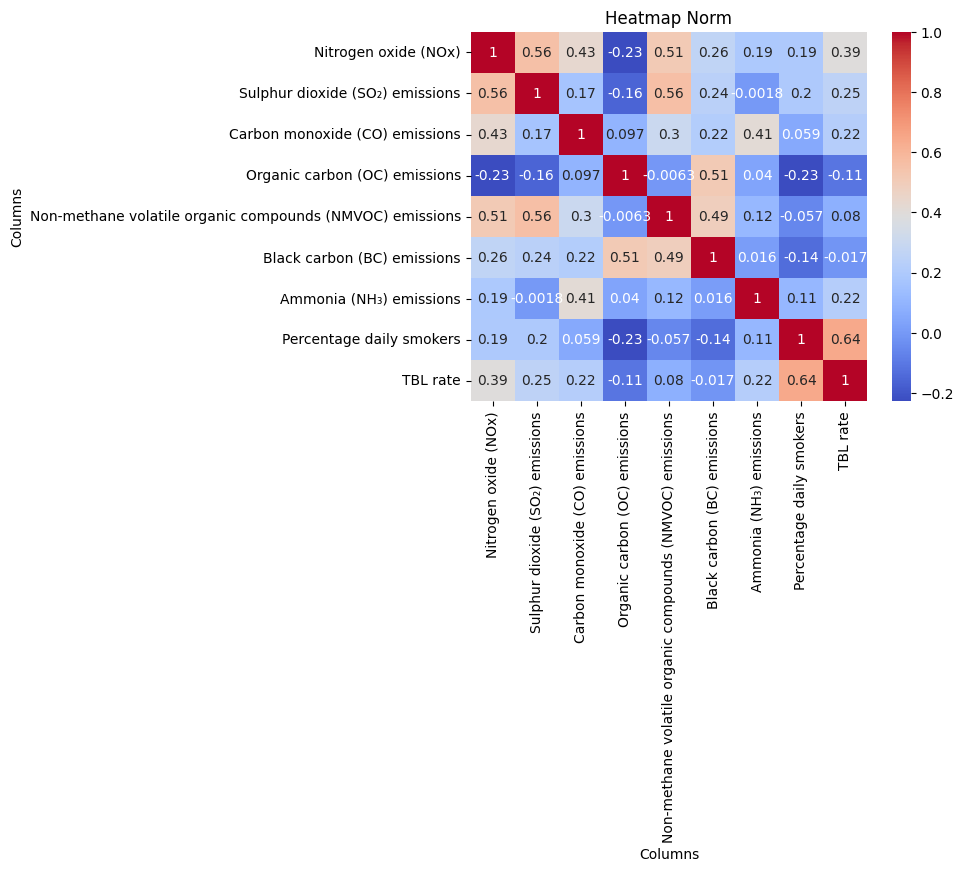

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


norm = pd.read_csv('datasets/norm.csv')


corr2 = norm.corr(numeric_only=True)
corr_trimmed2 = corr2.iloc[2:, 2:]


sns.heatmap(corr_trimmed2, annot=True, cmap='coolwarm')
plt.title('Heatmap Norm')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()



> *Figure 5: Heatmap van de Pearson's R tussen elk variabel.*

In deze heatmap wordt de correlatie matrix grafisch weergegeven en is het voor ons belangrijk om te kijken naar de onderste rij of de laatste kolom. Hier wordt de TBL cancer rate gecorreleerd met alle broeikasgas uitstoten en de metriek van mensen die elke dag roken. We kijken niet naar TBL rate/TBL rate want die waarden zijn gelijk en geven  altijd waarde 1. Dit geldt voor de hele identiteitsmatrix. De hoogste correlatie is te vinden tussen TBL en het aantal mensen dat rookt per dag (0.64). Dit suggereert dat hoe meer mensen er per dag roken, hoe meer mensen te maken krijgen met een vorm van TBL kanker. Een ander redelijk significant cijfer is de 0.39 tussen TBL en het de uitstoot van stikstofoxiden (NOx). Dit is interessant want als we bekijken welke broeikasgas het meest wordt uitgestoot, dan zien we dat dat koolstofmonoxide is (CO), dat bijna in elk jaar meer dan de helft van de totale uitstoot beslaat.

### Argument: Luchtvervuiling neemt al af.

Luchtvervuiling is al aan het krimpen, snellere vermindering is niet nodig.

In [7]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly

df = pd.read_csv('datasets/norm.csv')
df_total_emission = df.copy()
df_total_emission = df_total_emission[df_total_emission['Code'] != 'LUX']
df_total_emission['Total emission'] = df_total_emission[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
                                                       'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Black carbon (BC) emissions',
                                                       'Ammonia (NH₃) emissions']].sum(axis=1)

fig = px.choropleth(
                    df_total_emission,
                    locations="Code",
                    color="Total emission",
                    range_color=(df_total_emission['Total emission'].min(), df_total_emission['Total emission'].max()), 
                    animation_frame="Year",
                    height=600,
                    color_continuous_scale=plotly.colors.sequential.Jet
)
fig.update_layout(title='Totale uitstoot per 1.000 inwoners (ton)',coloraxis_colorbar_title_text = 'Totale uitstoot')

fig.show()

> *Figure 6: Kaart met de gemiddelde uitstoot van luchtvervuilende stoffen*

## Reflection

### Peer feedback
Op 20 juni 2024 is ons groepje N5 samengekomen met een ander groepje en de TA voor peer feedback. Ieder groepje heeft zijn werk van de afgelopen 3 weken gepresenteerd en het andere groepje en de TA hebben feedback gegeven over de punten die er goed uitzagen en de dingen die beter uitgevoerd kunnen worden.

De algemene complimenten die we hebben ontvangen op onze eerste versie is dat de data die we hadden goed aansloot op de materie die we behandelden en dat het geen natte vingerwerk is geweest, en dat de visualisatie van de data in de grafieken destijds erg ‘satisfying’ was en dat het een goed beeld geeft van de perspectieven die zijn behandeld.

Feedback over hetgeen dat beter kon bedroeg over het algemeen details over hoe de grafieken beter vormgegeven konden worden. Zoals een slider toevoegen aan de grafieken om de dynamiek te zien van de wereldwijde uitstoot, evenals het verwijderen van data dat weinig effect heeft gehad op de uiteindelijke verdeling van variabelen.

De feedback was voor ons gerechtvaardigd en we zijn ermee aan de slag gegaan. Zo zit er nu een slider bij de wereldkaart waar dat voorheen niet was en hebben we de waarden uit de wereldwijde uitstoot gefilterd omdat de kleinste fracties ervoor zorgden dat onze grafieken niet geordend waren.

### Zelfreflectie
In het onderzoeksvoorstel was het voordehand liggend om te focussen op TBL kanker, ofwel luchtwegkanker in relatie met luchtvervuiling en roken. Echter hebben we tijdens het onderzoeksvoorstel ook nog andere vormen van kanker bestudeerd zoals borst-, lever- en pancreaskanker die volgens het ACCR (2020) ook relatief veel voorkomend zijn in correlatie met luchtvervuiling. Als we meer tijd hadden gehad voor het onderzoek hadden we de genoemde kankersoorten ook tegenover roken en luchtvervuiling willen zetten in onze uiteindelijke Data Story. Als hier namelijk ook een correlatie gevonden kan worden is het belangrijk om dat verder te onderzoeken, sinds het zou kunnen betekenen dat meer mensen een risico op andere soorten kanker kunnen ondervinden van roken of luchtvervuiling.
ACCR. (2020, 31 januari). Air Pollution May be Associated With Many Kinds of 

## Work Distribution

In de eerste fase van het project bestond N5 uit alleen Wietske, Isa en Alecsandru. Timber heeft zich na het onderzoeksvoorstel gepresenteerd te hebben bij ons gevoegd en bleek een onmisbaar element sinds hij enige ervaring had en de rest ook begeleiding kon bieden buiten de werkgroepen.

Tijdens het project hebben we elkaar het meest gesproken tijdens de werkgroepen. Dit waren tevens onze standaard meeting dagen, omdat we het geleverde werk dat we individueel hadden gedaan konden samenvoegen, en vervolgens met z’n allen naar de werkgroep konden gaan om vragen te stellen over de gang van zaken. Toekomstige afspraken hebben we vooral via Whatsapp gemaakt en hebben ze individueel geïmplementeerd. 

Tijdens onze eerste groepsbijeenkomst hebben we onderwerpen gekozen die we aan elkaar wilden correleren en gezamenlijk bijbehorende datasets gezocht die ons streven benaderen. Hierna zijn de datasets opgeschoond en samengevoegd gebaseerd op jaar (zie Dataset Preprocessing). Daarna zijn we gelijk aan de slag gegaan met het verzinnen van de data story eromheen en bijpassende grafieken te maken die onze perspectieven op een inhoudelijke en correcte wijze zouden weergeven. Dit bracht ons naar de voorlopige versie van de data story die we in de overige tijd hebben aangepast gebaseerd op de feedback en afgemaakt hebben.

### Isa
Isa heeft zich beziggehouden met de vormgeving van grafieken, de data-analyse van de luchtvervuiling en het in context brengen van de verschillende perspectieven samen met Wietske.

### Wietske
Wietske is verantwoordelijk voor de vormgeving van de grafieken, het schrijven van de inleiding, en het in context brengen van de context van de verschillende perspectieven samen met Isa. Ze heeft ook data uit 2012 samengevoegd, het laatste jaar waar alle datasets overeenkomen.

### Timber
Timber is verantwoordelijk voor vormgeving van grafieken en de meeste data preprocessing, zowel het cleanen als het samenvoegen van de datasets die we hebben gekozen. Hij heeft de Github repository gemanaged en ervoor gezorgd dat de layout op de website begrijpelijk en geordend is.

### Alecsandru
Alecsandru heeft zich beziggehouden met het vormgeven van de grafieken, het schrijven van de reflectie en de werkverdeling en de teksten bij de data story die context geven aan grafieken.


## References

* EenVandaag. (2020, 17 november). Nog meer mensen met longkanker in de omgeving van Tata Steel dan eerder bekend. https://eenvandaag.avrotros.nl/item/nog-meer-mensen-met-longkanker-in-de-omgeving-van-tata-steel-dan-eerder-bekend/
* Greenpeace Nederland. (2024, 21 april). People vs polluters: Tata Steel. Greenpeace Nederland. https://www.greenpeace.org/nl/acties/tata-steel/
* CIA. (2017) GDP - composition, by sector of origin. https://www.cia.gov/the-world-factbook/field/gdp-composition-by-sector-of-origin/
* Cancer. American Association For Cancer Research. https://www.aacr.org/patients-caregivers/progress-against-cancer/air-pollution-associated-cancer/#:~:text=It%27s%20no%20surprise%20that%20air,%2C%20liver%2C%20and%20pancreatic%20cancer.